In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations, permutations
from intervals import Interval
import warnings
warnings.filterwarnings("ignore")

In [309]:
pd.set_option("display.max_rows", 20)

# 2

In [389]:
data = pd.read_csv("distance.csv", encoding = 'big5', index_col="Unnamed: 0")
data

,中坡,中研,中貿,玉成,玉德,向揚,庄研,佳樂,忠陽,昆陽,...,雄強,慈愛,新福玉,經貿,聯成,聯坊,馥樺,鵬馳,耀港,鑫貿
中坡,0.00,5.4,4.70,2.20,0.45,2.40,5.6,3.4,2.00,1.70,...,1.2,3.0,0.50,4.00,1.8,1.1,4.4,2.00,4.10,4.70
中研,5.40,0.0,2.70,4.30,5.30,4.20,1.1,2.7,3.80,4.40,...,4.9,3.7,5.50,2.30,3.9,5.0,2.5,4.60,1.40,2.30
中貿,4.70,2.7,0.00,3.40,4.50,3.30,2.6,1.5,3.00,3.60,...,4.1,2.0,4.70,0.75,3.1,4.2,0.6,3.60,1.00,0.13
玉成,2.20,4.3,3.40,0.00,2.30,0.45,4.4,1.6,0.80,1.40,...,1.9,1.0,2.50,2.20,0.9,2.0,3.2,0.26,2.90,3.30
玉德,0.45,5.3,4.50,2.30,0.00,2.20,5.3,3.1,1.80,1.40,...,0.9,2.7,0.65,3.70,1.6,0.6,4.2,1.70,3.80,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
聯坊,1.10,5.0,4.20,2.00,0.60,2.40,5.2,2.9,1.70,1.20,...,1.8,2.5,0.65,3.80,1.1,0.0,3.7,1.80,3.40,4.00
馥樺,4.40,2.5,0.60,3.20,4.20,3.00,2.7,1.1,2.80,2.70,...,3.3,1.7,4.70,0.13,2.8,3.7,0.0,2.70,1.30,0.40
鵬馳,2.00,4.6,3.60,0.26,1.70,1.10,4.8,1.9,0.75,0.75,...,1.3,1.2,2.10,2.80,0.9,1.8,2.7,0.00,3.20,3.60
耀港,4.10,1.4,1.00,2.90,3.80,3.40,1.7,1.3,2.60,2.40,...,2.9,2.3,4.00,1.10,2.5,3.4,1.3,3.20,0.00,0.85


# 3

In [3]:
def create_candidate(initial, tabu_list = []):
    initial = list(initial)
    candidate_dict = {}
    L = list(range(len(initial)))
    L.pop(0)
    moves = list(combinations(L,2))
    for tabu in tabu_list:
        moves.pop(moves.index(tabu))
    for move in moves:
        clone = initial.copy()
        clone[move[0]], clone[move[1]] = initial[move[1]], initial[move[0]]
        candidate_dict.update({tuple(clone):move})
    return candidate_dict

In [4]:
def count_distance(candidate_dict):
    num = len(list(candidate_dict.keys())[0])
    distance_dict = {}
    for shop, moves in candidate_dict.items():
        distance_dict.update({shop:np.around(sum([data.loc[shop[i], shop[i+1]] for i in range(-num, 0)]), 2)})
    return distance_dict

In [5]:
def get_key (D, value):
    return [k for k, v in D.items() if v == value]

In [431]:
def visualizing(state_best, distances, name):
    print(f"The minimal distance by {name} way is {np.round(min(distances))} km.")
    print(f"The best state of store names in order is {state_best}")
    plt.title(name)
    plt.plot(distances)
    plt.xlabel("iteration")
    plt.ylabel("distance")
    plt.show()

### Hill_Climbing

In [331]:
def Hill_Climbing(data, max_iterations=100):
    index = np.random.choice(len(data), size = len(data.columns), replace = False)
    state_best = state_cur = tuple(data.columns[np.array(index)])
    distance_best =  distance_cur = sum(count_distance({state_cur:(0, 0)}).values())
    distances = []
    iteration = 1
    while iteration <= max_iterations:
        candidate_dict = create_candidate(state_cur)
        distance_dict = count_distance(candidate_dict)
        
        state_new = get_key(distance_dict, min(distance_dict.values()))[0]
        distance_new = min(distance_dict.values())
        if distance_new < distance_best:
            state_best = state_cur = state_new 
            distance_best =  distance_cur = distance_new
        distances.append(distance_best)
        iteration += 1
    return state_best, distances

In [332]:
state_best1, distances1 = Hill_Climbing(data)

The minimal distance by Hill_Climbing way is 35.0 km.
The best state of store names in order is ('馥樺', '中貿', '鑫貿', '港興', '慈愛', '重陽', '鵬馳', '凱松', '港運', '雄強', '玉德', '中坡', '港德', '新福玉', '林坊', '聯坊', '港麗', '港高鐵', '港勝', '港捷', '胡適', '研究', '玉成', '向揚', '港環球', '佳樂', '香城', '耀港', '中研', '庄研', '華技', '港泰', '聯成', '昆陽', '忠陽', '經貿')


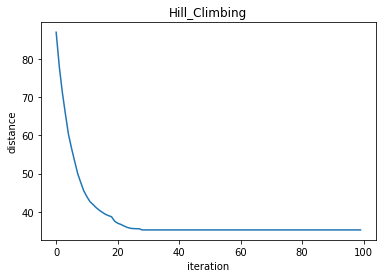

In [681]:
visualizing(state_best1, distances1, "Hill_Climbing")

## Random_Walk

In [10]:
def Random_Walk(data, max_iterations=100):
    index = np.random.choice(len(data), size = len(data), replace = False)
    state_best = state_cur = tuple(data.columns[np.array(index)])
    distance_best =  distance_cur = sum(count_distance({state_cur:(0, 0)}).values())
    distances = []
    iteration = 1
    while iteration <= max_iterations:
        candidate_dict = create_candidate(state_cur)
        distance_dict = count_distance(candidate_dict)
        
        state_cur = state_new = get_key(distance_dict, min(distance_dict.values()))[0]
        distance_cur = distance_new = min(distance_dict.values())
        
        if distance_new < distance_best:
            state_best = state_new
            distance_best =  distance_new
        distances.append(distance_best)
        iteration += 1
    return state_best, distances

In [334]:
state_best2, distances2 = Random_Walk(data)

The minimal distance by Random_Walk way is 32.39 km.
The best state of store names in order is ('聯成', '聯坊', '新福玉', '港德', '中坡', '林坊', '玉德', '港運', '凱松', '鵬馳', '佳樂', '研究', '胡適', '港勝', '港高鐵', '港環球', '港興', '慈愛', '重陽', '香城', '耀港', '中研', '華技', '庄研', '港捷', '經貿', '馥樺', '鑫貿', '中貿', '港泰', '港麗', '昆陽', '雄強', '忠陽', '向揚', '玉成')


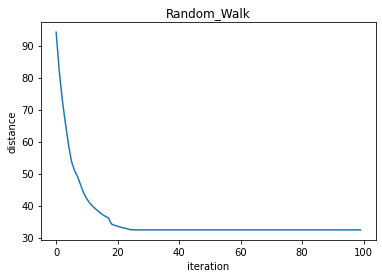

In [335]:
visualizing(state_best2, distances2, "Random_Walk")

## GA

In [493]:
def Selection(index_list, n = 10, p_s = 0.6):
    m = int(n * p_s)
    Selected, Unselected = [], []
    distance_list = []
    index_list = np.array([np.random.choice(len(data), size = len(data), replace = False) for _ in range(n)])
    for index in index_list:
        distance_list.append(sum([data.iloc[index[i], index[i+1]] for i in range(-len(data.columns), 0)]))
    distance_arr = np.array(distance_list)
    prob_list = (1- distance_arr / sum(distance_arr))/(len(distance_arr)-1)
    num = np.random.choice(range(len(index_list)), m, p = prob_list, replace = False) 
    Selected.extend(index_list[num])
    Unselected.extend(index_list[list(set(range(m)) - set(num) )])
    return Selected, Unselected 

In [14]:
def Crossover(mate_pool, length = 10, p_c = 0.8):
    offsprings = []
    if len(mate_pool) == 0:
        return []
    for i in range(0, len(mate_pool), 2):
        if np.random.uniform(0, 1) > p_c:
            offsprings.append(mate_pool[i])
            offsprings.append(mate_pool[i+1])
            continue
        else:
            L1, L2 = mate_pool[i], mate_pool[i+1]
            position = np.random.choice(len(L1)-4)
            G1, G2 = list(L1[position:position+length]), list(L2[position:position+length])
            O1, O2 = list(L1[position+length:]), list(L2[position+length:])
            O1.extend(L1[:position+length])
            O2.extend(L2[:position+length])
            for i in range(len(O1)):
                if (position + len(G2)) <= (len(O1) - 1):
                    if O1[i] not in G2:
                        G2.append(O1[i])
                else:
                    if O1[i] not in G2:
                        G2.insert(position + len(G2) - len(O1), O1[i])
            for i in range(len(O2)):
                if (position + len(G1)) <= (len(O2) - 1):
                    if O2[i] not in G1:
                        G1.append(O2[i])
                else:
                    if O2[i] not in G1:
                        G1.insert(position + len(G1) - len(O2), O2[i])
            offsprings.append(np.array(G1))
            offsprings.append(np.array(G2))
    return np.array(offsprings)

In [15]:
def Mutation(population, p_m = 0.1):
    for individual in population:
        for i in range(len(individual)):
            if np.random.uniform(low = 0, high = 1) <= p_m:
                a = np.random.choice(len(individual)-1)
                individual[i], individual[a] = individual[a], individual[i]
    return population

In [686]:
def GA(n = 10, iteration = 10, p_c = 0.8, p_m = 0.1, p_s = 0.6):
    index_list = np.array([np.random.choice(len(data), size = len(data), replace = False) for _ in range(n)])
    population_cur = list(map(tuple, data.columns[np.array(index_list)]))
    distances = []
    D = {}
    for individual in population_cur:
        D.update({individual:sum(count_distance({individual:(0, 0)}).values())})
    state_best = state_cur = get_key(D, min(D.values()))
    distance_best =  distance_cur = min(D.values())
    for i in range(iteration):
        mate_pool, unselected = Selection(index_list, n) if i == 0 else Selection(new_generation, n)
        offsprings = Mutation(Crossover(mate_pool))
        parents = Mutation(mate_pool)
        generation = np.append(offsprings , parents, axis = 0)
        
        distance_list = []
        for index in generation:
            distance_list.append(sum([data.iloc[index[i], index[i+1]] for i in range(-len(data.columns), 0)]))
        distance_arr = np.array(distance_list)
        prob_list = (1- distance_arr / sum(distance_arr))/(len(distance_arr)-1)
        num = np.random.choice(range(len(generation)), n, p = prob_list, replace = False) 
        new_generation = generation[num]
        
        
        D = {}
        for individual in list(map(tuple, data.columns[np.array(new_generation)])):
            D.update({individual:sum(count_distance({individual:(0, 0)}).values())})
        state_cur = get_key(D, min(D.values()))
        distance_cur = min(D.values())
        if distance_cur < distance_best:
            state_best = state_cur
            distance_best =  distance_cur
        distances.extend([distance_best])
        print(i)
    return state_best, distances

In [939]:
state_best3, distances3= GA(n = 630, iteration = 100, p_c = 0.8, p_m = 0.1, p_s = 0.8)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


The minimal distance by GA way is 60.0 km.
The best state of store names in order is [('玉成', '中坡', '雄強', '港環球', '港興', '華技', '庄研', '馥樺', '中研', '胡適', '中貿', '鑫貿', '慈愛', '凱松', '新福玉', '玉德', '港運', '聯成', '香城', '港德', '昆陽', '重陽', '佳樂', '研究', '港勝', '耀港', '港高鐵', '港泰', '經貿', '港麗', '港捷', '鵬馳', '向揚', '聯坊', '忠陽', '林坊')]


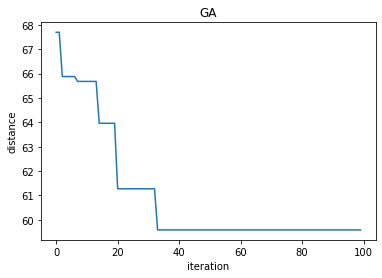

In [940]:
visualizing(state_best3, distances3, "GA")

## Simulated_Annealing

In [311]:
def Get_temperature(T, iteration, c = 0.025):
    return (1-c)**iteration * T

In [312]:
def Update_probability(cost_cur, cost_new, T, k = 0.01):
    if cost_new <= cost_cur:
        return 1
    else:
        return np.exp(-(cost_new - cost_cur) / (k * T))

In [313]:
def Simulated_Annealing(data, Get_temperature, Update_probability, max_iterations=100, min_T = 0.01):
    T_list = []
    for i in range(11):
        index = np.random.choice(len(data), size = len(data), replace = False)
        initial = tuple(data.columns[np.array(index)])
        T_list.append(sum(count_distance({initial:(0, 0)}).values()))
    T = np.array(T_list).mean()
    state_best = state_cur = tuple(data.columns[np.array(index)])
    distance_best =  distance_cur = sum(count_distance({state_cur:(0, 0)}).values())
    distances = []
    iteration = 1
    times = 0
    while (T > min_T) and (iteration <= max_iterations):
        candidate_dict = create_candidate(state_cur)
        distance_dict = count_distance(candidate_dict)
        
        state_new = get_key(distance_dict, min(distance_dict.values()))[0]
        distance_new = min(distance_dict.values())
        
        if Update_probability(distance_best, distance_new, T, k = 0.1) > np.random.uniform(0, 1):
            state_cur = state_new
            distance_cur =  distance_new
            times += 1
            T = Get_temperature(T, times)
            if distance_new < distance_best:
                state_best = state_new
                distance_best = distance_new
        distances.append(distance_best)  
        iteration += 1  
    return state_best, distances   

In [314]:
state_best4, distances4 = Simulated_Annealing(data, Get_temperature, Update_probability)

The minimal distance by Simulated_Annealing way is 28.35 km.
The best state of store names in order is ('中貿', '耀港', '中研', '庄研', '華技', '胡適', '研究', '佳樂', '香城', '港勝', '港捷', '經貿', '昆陽', '聯成', '林坊', '聯坊', '新福玉', '港德', '雄強', '忠陽', '玉成', '鵬馳', '凱松', '港運', '中坡', '玉德', '向揚', '重陽', '慈愛', '港興', '港環球', '港泰', '港麗', '港高鐵', '馥樺', '鑫貿')


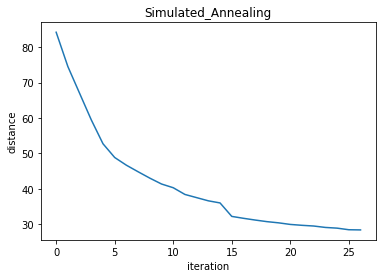

In [23]:
visualizing(state_best4, distances4, "Simulated_Annealing")

## Tabu_Search

In [24]:
def update_tabu_list(tabu_list, move, max_tabu):
    tabu_list.append(move)
    if len(tabu_list) > max_tabu:
        tabu_list.pop(0)
    return tabu_list

In [337]:
def Tabu_Search(data, max_iterations=100, max_tabu = 10):
    index = np.random.choice(len(data), size = len(data), replace = False)
    state_best = state_cur = tuple(data.columns[np.array(index)])
    distance_best =  distance_cur = sum(count_distance({state_cur:(0, 0)}).values())
    distances = []
    tabu_list = []
    iteration = 1
    while iteration <= max_iterations:
        candidate_dict = create_candidate(state_cur, tabu_list)
        distance_dict = count_distance(candidate_dict)
        state_new = get_key(distance_dict, min(distance_dict.values()))[0]
        distance_new = min(distance_dict.values())
        
        move = candidate_dict[state_new]
        update_tabu_list(tabu_list, move, max_tabu)
        state_cur = state_new 
        distance_cur = distance_new
        if distance_new < distance_best:
            state_best = state_cur = state_new 
            distance_best =  distance_cur = distance_new
        distances.append(distance_best)
        iteration += 1
    return state_best, distances

In [338]:
state_best5, distances5 = Tabu_Search(data)

The minimal distance by Tabu_Search way is 27.02 km.
The best state of store names in order is ('研究', '胡適', '華技', '庄研', '中研', '耀港', '港勝', '港高鐵', '港泰', '港環球', '港興', '佳樂', '香城', '經貿', '馥樺', '港捷', '鑫貿', '中貿', '慈愛', '重陽', '向揚', '玉成', '鵬馳', '凱松', '港運', '中坡', '玉德', '雄強', '忠陽', '昆陽', '聯成', '林坊', '聯坊', '新福玉', '港德', '港麗')


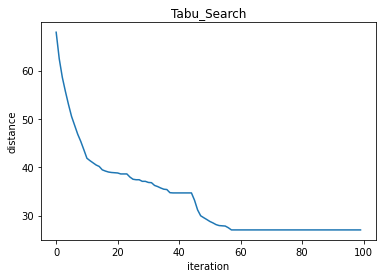

In [339]:
visualizing(state_best5, distances5, "Tabu_Search")

## PSO

In [840]:
def vec(X, Y):
    A, B = X.copy(), Y.copy()
    vec = []
    for i in range(len(A)):
        j = np.where(A == B[i])[0][0]
        if i != j:
            vec.append(tuple([np.where(A == B[i])[0][0], i]))
            A[i], A[j] = A[j], A[i]
    return vec

In [792]:
def count_d(position):
    distance_list = []
    for i in range(len(position)-1):
        distance_list.append(data.iloc[tuple([position[i], position[i+1]])])
    return np.round(sum(distance_list), 2)

In [888]:
def swap(position, vel):
    A = position.copy()
    for i in vel:
        A[i[0]], A[i[1]] = A[i[1]], A[i[0]]
    return A

In [934]:
def PSO(data, n = 10, iterations = 10, p0 = 0.7, p1 = 0.2, p2 = 0.1):
    positions = np.array([np.random.choice(len(data), size = len(data), replace = False) for _ in range(n)])
    previous_step = positions
    pbest = positions
    gbest = [positions[np.argmin([count_d(position) for position in positions])]]
    distances = []
    gap0, gap1, gap2 = -0.1*1/n, 0.1*1/n, 0.5*1/n
    for iteration in range(iterations):
        print(iteration)
        p0, p1, p2 = 0.7-(0.6*iteration/iterations), 0.2+(0.1*iteration/iterations), 0.1+(0.5*iteration/iterations)
        vel = [[] for _ in range(n)]
        for i in range(n):
            for move in vec(positions[i], previous_step[i]):
                r = np.random.uniform(0, 1)
                if r < p0:
                    vel[i].append(move)
            for move in vec(positions[i], pbest[i]):
                r = np.random.uniform(0, 1)
                if r < p1:
                    vel[i].append(move)
            for move in vec(positions[i], gbest[iteration]):
                r = np.random.uniform(0, 1)
                if r < p2:
                    vel[i].append(move)
            previous_step[i] = positions[i]
            positions[i] = swap(positions[i], vel[i])
            distance_cur = count_d(positions[i])
            distance_pbest = count_d(pbest[i])
            if distance_cur < distance_pbest:
                pbest.append(position)
        distance_gbest = min([count_d(position) for position in positions])
        distances.append(count_d(gbest[-1]))
        if distance_gbest < count_d(gbest[-1]):
            gbest.append(positions[np.argmin([count_d(position) for position in positions])])
        else:
            gbest.append(gbest[iteration])
    return tuple(data.columns[gbest[-1]]), distances

In [937]:
state_best6, distances6 = PSO(data, n = 630, iterations=100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


The minimal distance by PSO way is 36.0 km.
The best state of store names in order is ('重陽', '佳樂', '耀港', '研究', '庄研', '中研', '忠陽', '鵬馳', '玉成', '經貿', '中貿', '馥樺', '鑫貿', '港捷', '香城', '港泰', '港環球', '昆陽', '聯成', '雄強', '新福玉', '玉德', '港德', '聯坊', '林坊', '中坡', '港運', '凱松', '向揚', '慈愛', '港興', '港麗', '港高鐵', '港勝', '胡適', '華技')


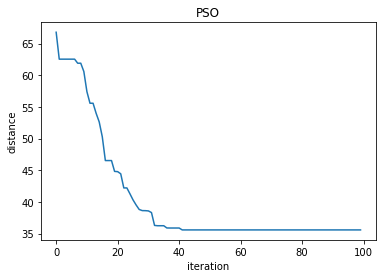

In [938]:
visualizing(state_best6, distances6, "PSO")

## ASO

In [659]:
def update_pheromone(pheromone, path_list, distance_list, zeta = 2 ,rho = 0.5):
    copy = pheromone
    evaporation = (1 - rho) * pheromone
    path_count = {}
    for path in set(path_list):
        plus = zeta * min(distance_list) / max(distance_list) * path_list.count(path)
        copy[path] =  plus + evaporation[path]
    return copy

In [693]:
def ACO(data, n = 10, iterations = 10, alpha = 0.7, beta = 0.7):
    distances = []
    distance_best = np.inf
    pheromone = np.ones((len(data), len(data))) - np.eye(len(data))
    ants = np.random.uniform(0, 1, n)
    for i in range(iterations):
        print(i)
        all_path = []
        all_distance = []
        for k in range(n):
            path_list = []
            distance_list = []
            A = np.array([pheromone[i] for i in list(permutations(range(36),2))]) ** alpha
            B = (1 / np.array([data.iloc[i] for i in list(permutations(range(36),2))])) ** beta
            prob_arr = A*B / sum(A*B)
            path_candidate = np.array(list(permutations(range(36),2)))
            stores = list(range(36))
            for j in range(len(data)-1):
                ant = np.random.uniform(0, 1)
                if j == (len(data) - 1):
                    path_list.append(path_candidate[ant])
                    distance_list.append(data.iloc[path_candidate[ant]])
                    break

                chosen = np.random.choice(range(len(path_candidate)), 1, p = prob_arr)
                
                path_list.append(tuple(path_candidate[chosen].flatten()))
                distance_list.append(data.iloc[tuple(path_candidate[chosen].flatten())])
                stores.remove(path_list[j][1])
                if j == 0:
                    stores.remove(path_list[j][0])
                path_candidate = np.array([(path_list[j][1], k) for k in stores])
                A = np.array([pheromone[tuple(i)] for i in path_candidate]) ** alpha
                B = (1 / np.array([data.iloc[tuple(i)] for i in path_candidate])) ** beta
                prob_arr = A*B / sum(A*B)
            if sum(distance_list) < distance_best:
                state_best = list(data.columns[np.array([path_list[i][1] if i != -1 else path_list[0][0] for i in range(-1, len(path_list))])])
                distance_best = np.around(sum(distance_list), 2)
            all_path.extend(path_list)
            all_distance.extend(distance_list)
        distances.extend([distance_best])
        pheromone = update_pheromone(pheromone, all_path, all_distance)
    return state_best, distances

In [696]:
state_best7, distances7 = ACO(data, n = 630, iterations = 100, alpha = 0.7, beta = 0.7)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


The minimal distance by ACO way is 28.0 km.
The best state of store names in order is ['港德', '聯坊', '新福玉', '中坡', '雄強', '忠陽', '昆陽', '聯成', '凱松', '港運', '玉德', '林坊', '鵬馳', '玉成', '向揚', '慈愛', '港興', '港環球', '佳樂', '港高鐵', '港泰', '港麗', '香城', '港捷', '鑫貿', '中貿', '馥樺', '經貿', '耀港', '中研', '庄研', '華技', '胡適', '研究', '港勝', '重陽']


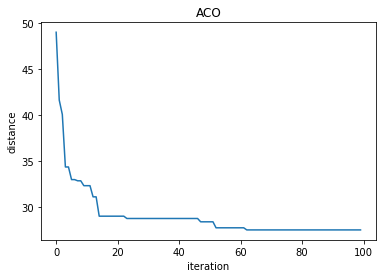

In [697]:
visualizing(state_best7, distances7, "ACO")

## Nearest_Neighbour

In [427]:
def Nearest_Neighbour():
    state_best = []
    distances = []
    for i in range(36):
        copy = data.copy()
        for j in range(len(copy)):
            copy.iloc[j, j] = np.inf
        start = copy.columns[i]
        path_list = [start]
        distance_list = []
        while len(path_list) <= 35:
            loc = copy[start].argmin()
            path_list.append(copy.columns[loc])  
            distance_list.append(copy[start].min())
            copy[start] = np.inf
            copy.loc[start, :] = np.inf
            start = copy.columns[loc]
        if len(state_best) == 0 or sum(distance_list) < min(distances):
            state_best = path_list
            distance_best = sum(distance_list)
        distances.append(distance_best)
    return state_best, distances

In [428]:
state_best8, distances8 = Nearest_Neighbour()

The minimal distance by Nearest_Neighbour way is 21.0 km.
The best state of store names in order is ['忠陽', '昆陽', '聯成', '雄強', '林坊', '聯坊', '玉德', '中坡', '新福玉', '港德', '港運', '凱松', '鵬馳', '玉成', '向揚', '重陽', '慈愛', '港興', '佳樂', '港高鐵', '港泰', '港麗', '港環球', '香城', '經貿', '馥樺', '鑫貿', '中貿', '港勝', '耀港', '港捷', '研究', '胡適', '中研', '庄研', '華技']


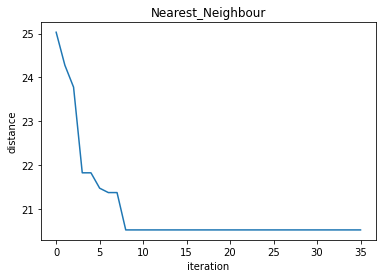

In [432]:
visualizing(state_best8, distances8, "Nearest_Neighbour")

## Comparison

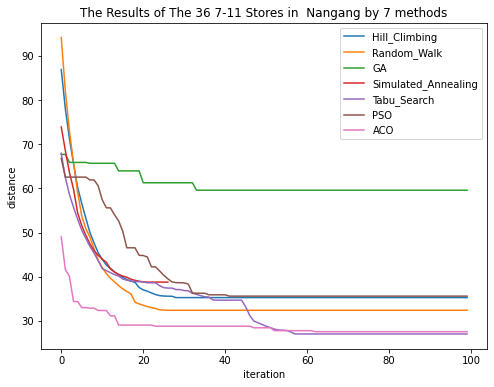

In [952]:
plt.figure(figsize = (8, 6))
plt.title("The Results of The 36 7-11 Stores in  Nangang by 7 methods")
plt.xlabel("iteration")
plt.ylabel("distance")
plt.plot(distances1, label = "Hill_Climbing")
plt.plot(distances2, label = "Random_Walk")
plt.plot(distances3, label = "GA")
plt.plot(distances4, label = "Simulated_Annealing")
plt.plot(distances5, label = "Tabu_Search")
plt.plot(distances6, label = "PSO")
plt.plot(distances7, label = "ACO")
plt.legend()
plt.show()

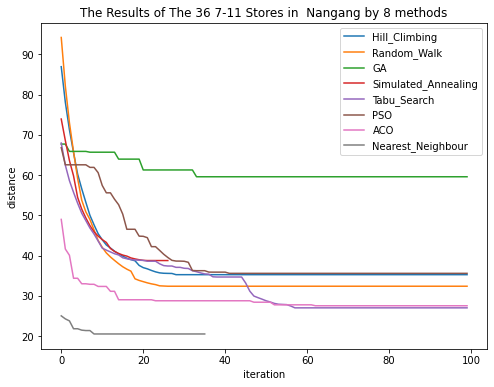

In [953]:
plt.figure(figsize = (8, 6))
plt.title("The Results of The 36 7-11 Stores in  Nangang by 8 methods")
plt.xlabel("iteration")
plt.ylabel("distance")
plt.plot(distances1, label = "Hill_Climbing")
plt.plot(distances2, label = "Random_Walk")
plt.plot(distances3, label = "GA")
plt.plot(distances4, label = "Simulated_Annealing")
plt.plot(distances5, label = "Tabu_Search")
plt.plot(distances6, label = "PSO")
plt.plot(distances7, label = "ACO")
plt.plot(distances8, label = "Nearest_Neighbour")
plt.legend()
plt.show()